# [LAB 10] 4. 가설검정의 가정

가설검정: 데이터의 `정규성, 등분산성, 독립성` 확인
> (데이터의 독립성은 데이터 수집과정 또는 참고문헌 인용할 때 확보되니까 `'정규성'이랑 '등분산성'만 확인하면 됨`.)

## #01. 준비작업

### 1. 패키지 참조:

In [1]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

# 가설검정용 패키지:
from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

- 예제: 동일한 제품을 판매중인 서로 다른 두 매장의 100일간 일별 매출액 가상 기록데이터
- 위 데이터 이용해서 두 매장의 평균 매출액 비교하고자 함
- 목표: 수집된 데이터가 평균 비교에 적합한지 검정

In [3]:
origin = load_data('two_store')

print('1. 데이터 크기:', origin.shape)
print('2. 데이터 정보:', origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata
1. 데이터 크기: (100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store1  100 non-null    int64
 1   store2  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
2. 데이터 정보: None


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58


## #02. 데이터 분포 확인

1. use: 'Hist+KDE plot' for 전반적 분포 확인
2. if 정규분포 충족:
   - -> shapes have to appear symmetric(skew x) and gentle(kurtosis x)

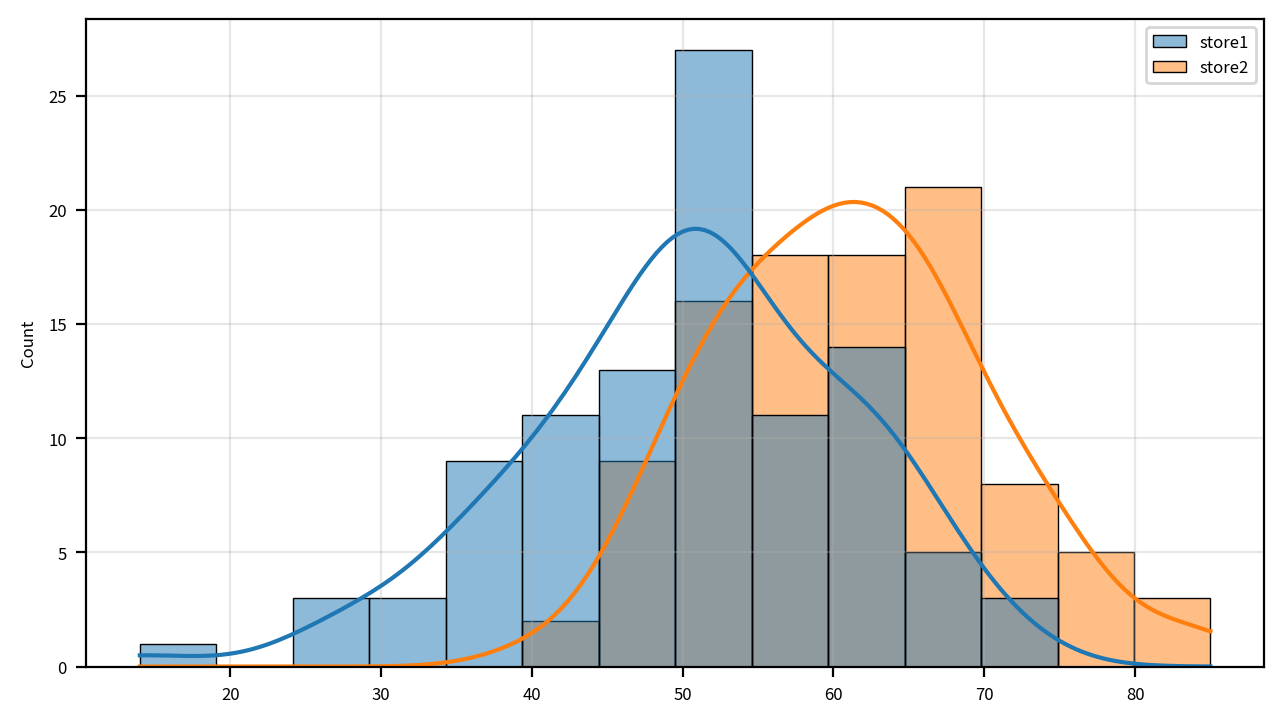

In [4]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Histogram 그리기: seaborn 사용
sb.histplot(data = origin, kde=True, 
            edgecolor = "#000000", linewidth = 0.5)

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)      # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료

> 모양만 보고 정규분포라고 확신 가능? 못하니까 수치 확인해보자:

## #03. 데이터 정규성 확인:

데이터 정규성 검정 방법: Shapiro Wilk 검정, Normal Test 검정

| 가설 | 내용 | 설명 |
| --- | --- | --- |
| 귀무가설(Hο) | p-value > 0.05 | 집단 간 데이터 분포엔 차이 없다 (정규성 따름) |
| 대립가설(H1) | p-value ≤ 0.05 | 집단 간 데이터 분포에 차이 있다 (정규성 안따름) |

### 1. Shapiro Wilk 검정

Shapiro Wilk 검정: 기준이 엄격한 편 (outlier x, symmetric shape) 

-> 현실에선 이 기준 충족하는 데이터 없다고 봐도 무방.
> 예제 데이터는 정규분포를 만족하는 난수로 생성한거임

#### (1) store1에 대한 Shapiro's 정규성 확인:

In [5]:
s, p = shapiro(origin['store1'])
#print(s, p)
'statistic: {0: .3f}, p-value: {1: .3f}, Shapiro 검정에 대한 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic:  0.979, p-value:  0.109, Shapiro 검정에 대한 정규성 충족 여부: True'

> p-value = 0.109 
> 
> => p > 0.05를 만족하므로 store1의 매출 데이터는 정규성을 따른다.

#### (2) store2에 대한 Shapiro's 정규성 확인:

In [6]:
s, p = shapiro(origin['store2'])
'statistic: {0: .3f}, p-value: {1: .3f}, \n Shapiro 검정에 대한 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic:  0.991, p-value:  0.731, \n Shapiro 검정에 대한 정규성 충족 여부: True'

> p-value = 0.731 
> 
> => p > 0.05를 만족하므로 store2의 매출 데이터도 정규성을 따른다.
> 
> 그러나 앞서 말했듯 샤피로 검정을 따르는 데이터는 현실에 거의 존재 안한다. 따라서:

### 2. Normal Test
- 정규성 충족 기준: 
  - |왜도| < 2, |첨도| < 7 (West et al., 1995)
  - 또는 p-value > 0.05
- Shapiro 검정보다 논문에 많이 인용됨 (상대적으로 느슨한 기준 때문)
#### (1) by 왜도와 첨도 직접 구하기
- 왜도(skew)와 첨도(kurtosis)로 정규성 검정함
- 왜도: peak의 tilting 정도 (비대칭성)
- 첨도: peak의 뾰족함 정도

##### store1의 왜도:

| 구분 | 내용 |
| --- | --- |
| 정규분포: | 왜도 = 0 | 
| 왼쪽으로 치우침: | 왜도 > 0 |
| 오른쪽으로 치우침: | 왜도 < 0 |

-> 정규성 충족 조건: |왜도| < 2

In [7]:
s = skew(origin['store1'])
print("- 왜도: %0.3f" % s)
print("- 왜도의 절대값: %0.3f" % abs(s))

- 왜도: -0.506
- 왜도의 절대값: 0.506


|왜도| < 2 범위 안에 듦으로 store1 데이터의 분포는 symmetric 하다고 봐도 된다.

##### store1의 첨도

| 구분 | 내용 |
| --- | --- |
| 정규분포: | 첨도 = 0 | 
| 위로 뾰족: | 첨도 > 0 |
| 아래로 뾰족: | 첨도 < 0 |

-> 정규성 충족 조건: |첨도| < 7

In [8]:
k = kurtosis(origin['store1'])
print("- 첨도: %0.3f" % s)
print("- 첨도의 절대값: %0.3f" % abs(k))

- 첨도: -0.506
- 첨도의 절대값: 0.422


|첨도| < 7 범위 안에 듦으로 store1 데이터의 분포는 완만하다고 봐도 된다.

-> 결론: Normal Test 검정 결과, store1의 매출데이터는 정규성을 충족함

##### store2의 왜도와 첨도 확인:

In [9]:
s = skew(origin['store2'])
k = kurtosis(origin['store2'])
print("- store2의 왜도의 절대값: %0.3f, 첨도의 절대값: %0.3f" % (abs(s), abs(k)))

- store2의 왜도의 절대값: 0.251, 첨도의 절대값: 0.178


-> 결론: Normal Test 검정 결과, store2의 매출데이터도 정규성을 만족한다.

#### (2) NormalTest를 통한 정규성 검정: by p-value
> 일일히 직접 구할 필요 없이 `.normaltest()` 호출해서 정규성 검정 ㄱ

##### store1의 정규성 확인

In [10]:
s, p = normaltest(origin['store1'])
"store1 - statistic: {0: .3f}, p-value: {1: .3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'store1 - statistic:  5.651, p-value:  0.059, 정규성 충족 여부: True'

##### store2의 정규성 확인

In [11]:
s, p = normaltest(origin['store2'])
"store2 - statistic: {0: .3f}, p-value: {1: .3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'store2 - statistic:  1.174, p-value:  0.556, 정규성 충족 여부: True'

##### 반복문으로 한번에 처리하기

In [12]:
fmt = '[{0}] statistic: {1: .3f}, p-value: {2: .3f}, 정규성 충족 여부: {3}'

for c in origin.columns:
    s, p = normaltest(origin[c])
    print(fmt.format(c, s, p, p > 0.05))

[store1] statistic:  5.651, p-value:  0.059, 정규성 충족 여부: True
[store2] statistic:  1.174, p-value:  0.556, 정규성 충족 여부: True


## #03. 데이터 등분산성 확인

- by: 잔차(오차의 분산) 동일 여부 확인

| 가설 | 내용 | 설명 |
| --- | --- | --- |
| 귀무가설(Hο) | p-value > 0.05 | 집단 간 데이터 분포엔 차이 없다 |
| 대립가설(H1) | p-value ≤ 0.05 | 집단 간 데이터 분포에 차이 있다 |

### 1. Bartlett 검정:

정규분포를 따르는 데이터 집단 간 분산이 같은지 다른지 여부를 알아볼 때 사용

In [13]:
# 파라미터 수에 제한 없음!
s, p = bartlett(origin['store1'], origin['store2'])
print("store1과 2 사이의 Bartlett 검정 결과: statistic: {0: .3f}, p-value: {1: .3f}, 등분산성 충족여부: {2}".format(s, p, p>0.05))

store1과 2 사이의 Bartlett 검정 결과: statistic:  3.143, p-value:  0.076, 등분산성 충족여부: True


> if 데이터 집단이 `정규분포를 따르지 않는다`면? use: ↓

### 2. 레빈 검정(Levene's test):

> (이 예제 데이터에선 적합한 방법이 아니겠지만, 코드 전개 과정을 제시하기 위해 사용함 걍)

In [14]:
# 파라미터 수에 제한 없음!
s, p = levene(origin['store1'], origin['store2'])
print("store1과 2 사이의 Levene's 검정 결과: statistic: {0: .3f}, p-value: {1: .3f}, 등분산성 충족여부: {2}".format(s, p, p>0.05))

store1과 2 사이의 Levene's 검정 결과: statistic:  1.360, p-value:  0.245, 등분산성 충족여부: True


### 3. 반복문으로 한번에 처리하기:

In [15]:
normal_dist = True      # 정규성 충족여부
data = origin.copy()    # 원본 데이터 복사본
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    s, p = bartlett(*fields) #'*ㅁ'는 데이터 ㅁ을 형식 없이 가져옴
    n = "Bartlett"
else:
    s, p = levene(*fields)
    n = "Levene's"

print("[{0} 검정] statistic: {1: .3f}, p-value: {2: .3f}, 정규성 충족여부: {3}".format(n, s, p, p>0.05))

[Bartlett 검정] statistic:  3.143, p-value:  0.076, 정규성 충족여부: True


## #04. 정규성, 등분산성 검정 결과표 만들기

In [16]:
data = melt(origin, var_name='store', value_name='value')
data

,store,value
0,store1,34
1,store1,63
2,store1,57
3,store1,50
4,store1,37
...,...,...
195,store2,69
196,store2,51
197,store2,65
198,store2,59


In [17]:
xname = 'store'
yname = 'value'

u1 = data[xname].unique() # unique: 종류들만 반환
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = data[data[xname] == i][yname]
    equal_var_fields.append(filtered_data)
    s, p = normaltest(filtered_data)

    normalize = p > 0.05
    report.append({
        "fields": i,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize
    # ↑: True(True and True), False(True and False)

if normal_dist:
    s, p = bartlett(*equal_var_fields)
    n = "Bartlett"
else:
    s, p = levene(*equal_var_fields)
    n = "Levene's"

report.append({
    "fields": n,
    "statistic": s,
    "p-value": p,
    "result": p > 0.05
})

report_df = DataFrame(report).set_index('fields')
report_df

,statistic,p-value,result
fields,,,
store1,5.651229,0.059272,True
store2,1.173772,0.556056,True
Bartlett,3.143307,0.076239,True
